In [1]:
import pandas as pd
diabetes = pd.read_csv('diabetes.csv')
diabetes

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0
3,1883350,9,103,78,25,304,29.582192,1.282870,43,1
4,1424119,1,85,59,27,35,42.604536,0.549542,22,0
...,...,...,...,...,...,...,...,...,...,...
14995,1490300,10,65,60,46,177,33.512468,0.148327,41,1
14996,1744410,2,73,66,27,168,30.132636,0.862252,38,1
14997,1742742,0,93,89,43,57,18.690683,0.427049,24,0
14998,1099353,0,132,98,18,161,19.791645,0.302257,23,0


In [2]:
features = ['Pregnancies','PlasmaGlucose','DiastolicBloodPressure','TricepsThickness','SerumInsulin','BMI','DiabetesPedigree','Age']
target = 'Diabetic'
X, y = diabetes[features], diabetes[target]

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

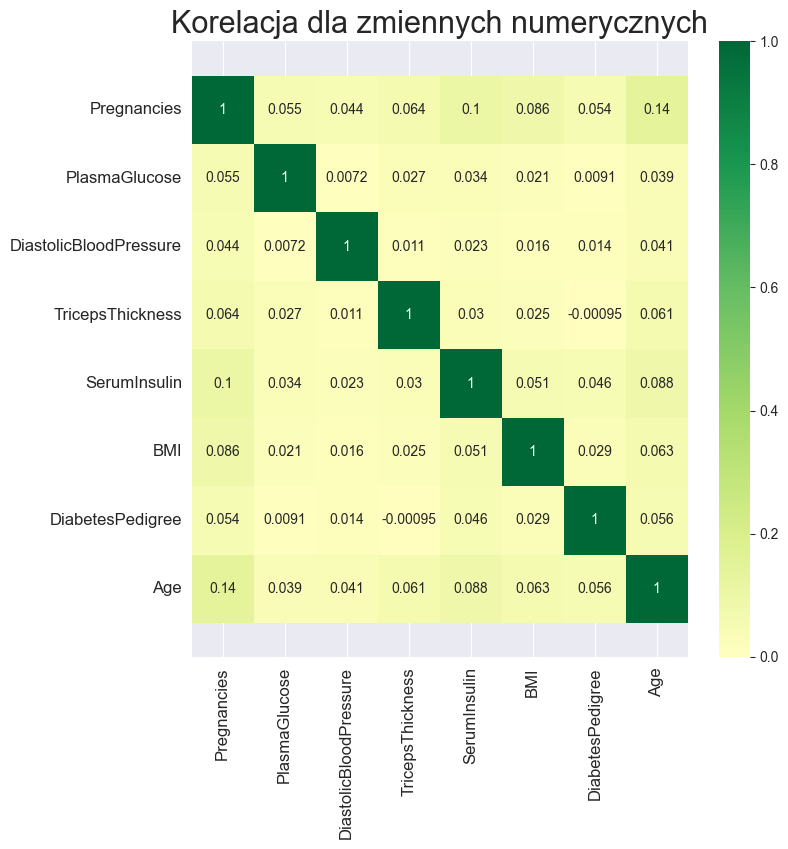

In [4]:
plt.figure(figsize=(8, 8))
ax = sns.heatmap(X.corr(),
                 xticklabels=X.corr().columns,
                 yticklabels=X.corr().columns,
                 cmap='RdYlGn',
                 center=0,
                 annot=True)

plt.title('Korelacja dla zmiennych numerycznych', fontsize=22)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X[['Pregnancies', 'Age']], y, test_size=0.30, random_state=0, stratify=y)
print ('Treningowe obserwacje: %d\nTestowe obserwacje: %d' % (X_train.shape[0], X_test.shape[0]))

Treningowe obserwacje: 10500
Testowe obserwacje: 4500


In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

scaler_2var = StandardScaler()
X_train_standardized = scaler_2var.fit_transform(X_train)
X_test_standardized = scaler_2var.transform(X_test)
model_lr = LogisticRegression()
model_lr.fit(X_train_standardized, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


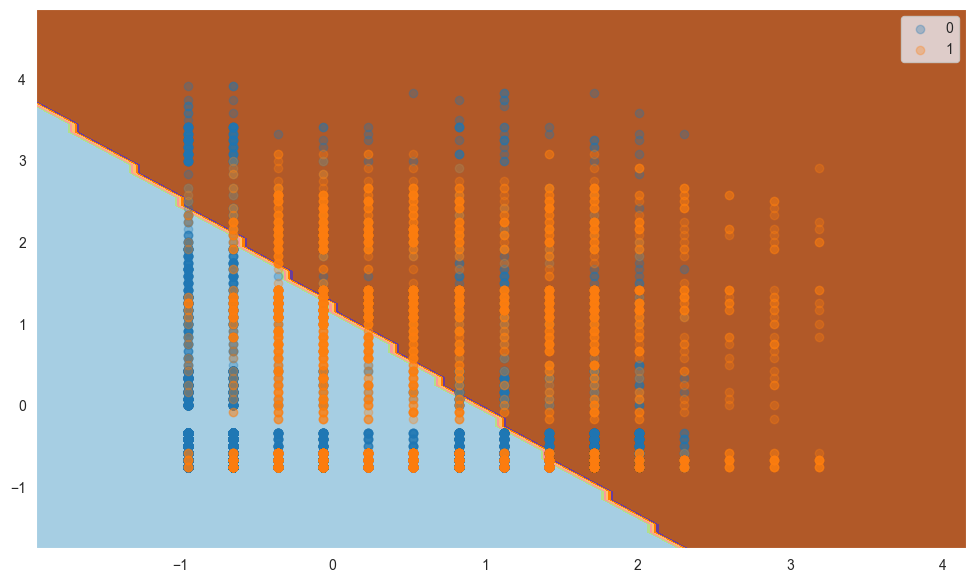

In [7]:
from numpy import where
from numpy import meshgrid
from numpy import arange
from numpy import hstack

def plot_classification_surface(X_plot, y_plot, trained_model):
    plt.figure(figsize=(12, 7))

    # określenie granic zbioru
    min1, max1 = X_plot[:, 0].min()-1, X_plot[:, 0].max()+1
    min2, max2 = X_plot[:, 1].min()-1, X_plot[:, 1].max()+1

    # skalowanie dla obu osi
    x1grid = arange(min1, max1, 0.1)
    x2grid = arange(min2, max2, 0.1)

    # utworzenie siatki
    xx, yy = meshgrid(x1grid, x2grid)

    # przetworzenie siatki w wektor
    r1, r2 = xx.flatten(), yy.flatten()
    r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

    # stworzenie zmiennych objaśniających dla modelu
    grid = hstack((r1,r2))

    # predykcja modelu zbioru
    yhat = trained_model.predict(grid)

    # przetworzenie predykcji na decyzji dla konkretnego punktu wykresu
    zz = yhat.reshape(xx.shape)

    # wizualizacja siatki z przyporządkowaną klasą
    plt.contourf(xx, yy, zz, cmap='Paired')

    # tworzenie wykresu punktowego dla klas ze zbioru X
    for class_value in range(2):

        # przyporządkowanie klasy (y) do obsewacji (X)
        row_ix = where(y_plot == class_value)

        # stworzenie wykresu punktowego
        plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], alpha=0.3, label=class_value)

    # wizualizacja wykresu
    plt.legend(loc='upper right')
    plt.show()

plot_classification_surface(X_plot=X_train_standardized, y_plot=y_train, trained_model=model_lr)

In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
predictions_lr = model_lr.predict(X_test_standardized)
print('Predicted labels: ', predictions_lr[:5], predictions_lr[-5:])
print('Actual labels:    ' , y_test[:5].values, y_test[-5:].values)
print('Accuracy: ', accuracy_score(y_test, predictions_lr))
print("Precision:", precision_score(y_test, predictions_lr))
print("Recall:", recall_score(y_test, predictions_lr))
print("F1_score:", f1_score(y_test, predictions_lr))

Predicted labels:  [0 0 1 0 0] [1 0 1 0 0]
Actual labels:     [0 1 0 0 0] [1 1 0 0 0]
Accuracy:  0.7451111111111111
Precision: 0.6426839126919968
Recall: 0.53
F1_score: 0.5809280233832663


In [9]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions_lr))

              precision    recall  f1-score   support

           0       0.78      0.85      0.82      3000
           1       0.64      0.53      0.58      1500

    accuracy                           0.75      4500
   macro avg       0.71      0.69      0.70      4500
weighted avg       0.74      0.75      0.74      4500



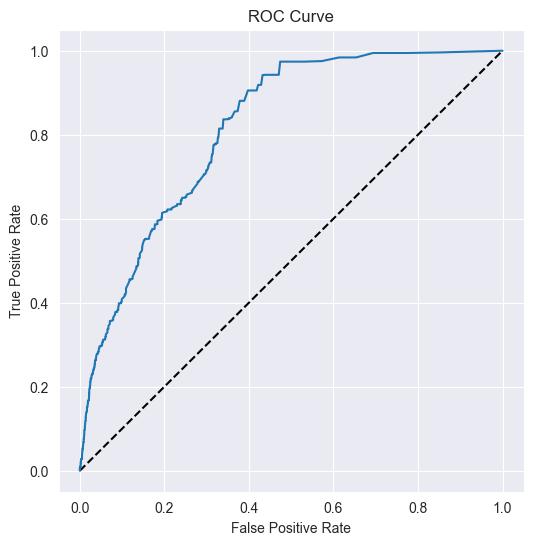

AUC: 0.8164931111111111


In [10]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# prognoza prawdopodobieństwa
predictions_probability_lr = model_lr.predict_proba(X_test_standardized)

# obliczenie FPR oraz TPR w zależności od punktu odcięcia
fpr, tpr, thresholds = roc_curve(y_test, predictions_probability_lr[:,1])

# wizualizacja ROC Curve
fig = plt.figure(figsize=(6, 6))

# rysowanie prostej dla modelu losowego
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# obliczenie AUC
auc = roc_auc_score(y_test, predictions_probability_lr[:,1])
print('AUC: ' + str(auc))

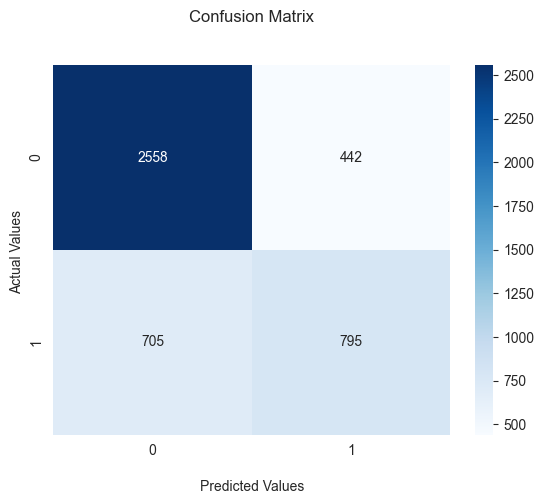

In [11]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, predictions_lr)
ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='.0f')
ax.set_title('Confusion Matrix\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')
plt.show()

In [12]:
metrics_dataframe = pd.DataFrame(columns = ['Model', 'F1_score', 'AUC'])
metrics_dataframe
models = []
models_names = []
predictions_proba_list = []
def calculate_metrics(model, name, X_checked, y_checked):
    models.append(model)
    models_names.append(name)
    global metrics_dataframe
    predictions = model.predict(X_checked)
    predictions_proba = model.predict_proba(X_checked)
    predictions_proba_list.append(predictions_proba[:,1])

    ############## metryki dla sprawdzanego modelu ################
    # Precision, Recall, F1, Accuracy
    print(classification_report(y_checked, predictions))

    # Confusion matrix
    plt.figure()
    cm = confusion_matrix(y_checked, predictions)
    ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='.0f')
    ax.set_title('Confusion Matrix\n\n')
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ')
    plt.show()

    # plot ROC curve
    fig = plt.figure(figsize=(6, 6))
    plt.plot([0, 1], [0, 1], 'k--')
    for model_selected, name_selected, pred_proba in zip(models, models_names, predictions_proba_list):
        fpr, tpr, thresholds = roc_curve(y_checked, pred_proba)
        plt.plot(fpr, tpr, label=name_selected)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

    f1_metric = f1_score(y_checked, predictions)
    auc_metric = roc_auc_score(y_checked, predictions_proba[:,1])
    model_dataframe = pd.DataFrame({'Model': [name], 'F1_score': [f1_metric], 'AUC': [auc_metric]})
    metrics_dataframe = pd.concat([metrics_dataframe, model_dataframe], ignore_index=True)
                                                 
    return metrics_dataframe

              precision    recall  f1-score   support

           0       0.78      0.85      0.82      3000
           1       0.64      0.53      0.58      1500

    accuracy                           0.75      4500
   macro avg       0.71      0.69      0.70      4500
weighted avg       0.74      0.75      0.74      4500



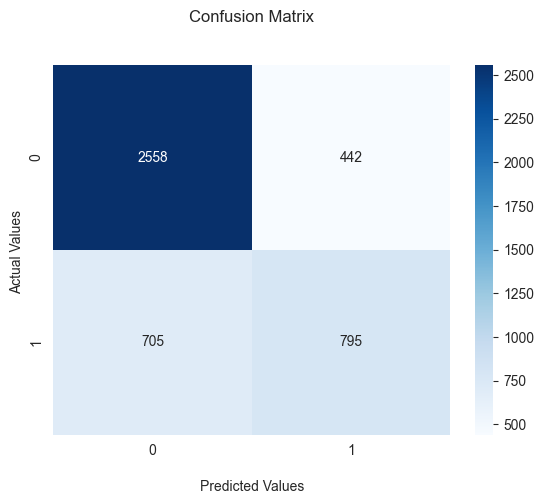

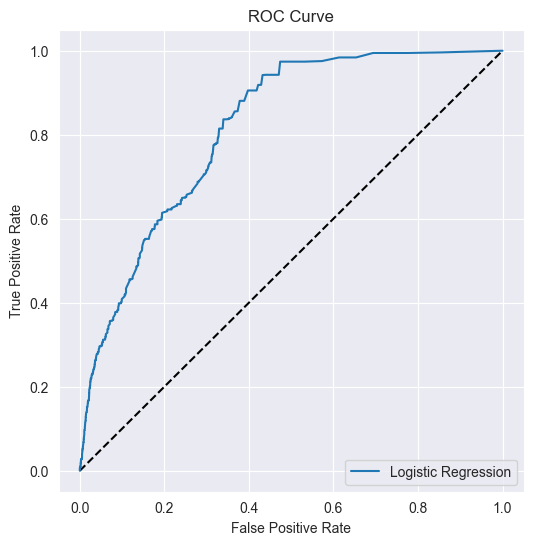

C:\Users\szcze\AppData\Local\Temp\ipykernel_54144\885174369.py:42: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  metrics_dataframe = pd.concat([metrics_dataframe, model_dataframe], ignore_index=True)


,Model,F1_score,AUC
0,Logistic Regression,0.580928,0.816493


In [13]:
calculate_metrics(model_lr, 'Logistic Regression', X_test_standardized, y_test)

# Zwizualizuj działanie modelu z wykorzystaniem funkcji plot_classification_surface oraz za każdym razem oblicz F1_score na zbiorze treningowym oraz testowym (zobaczysz czy model przypadkiem się nie przeucza).


In [14]:
penalties = ["l1", "l2"]
C_values = [0.01, 0.1, 1, 10, 100]
tmodels = []
tmodels_names = []

for penalty in penalties:
    for c in C_values:
        model = LogisticRegression(penalty=penalty, 
                                    C=c,
                                    solver="liblinear",  
                                    max_iter=10000)
        model.fit(X_train_standardized, y_train)
        tmodels.append(model)
        model_name = f"LogReg Penat:{penalty}, C:{c}"
        tmodels_names.append(model_name)


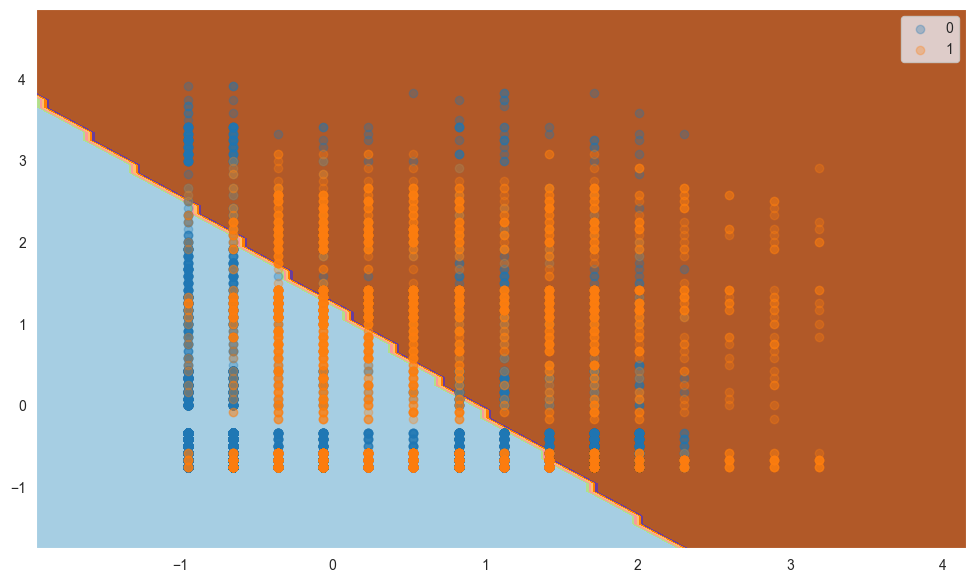

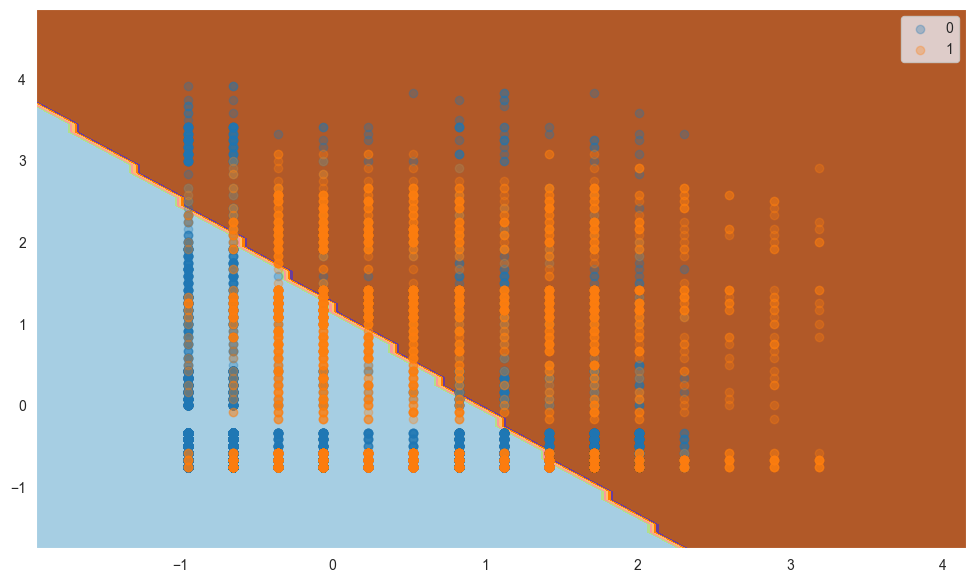

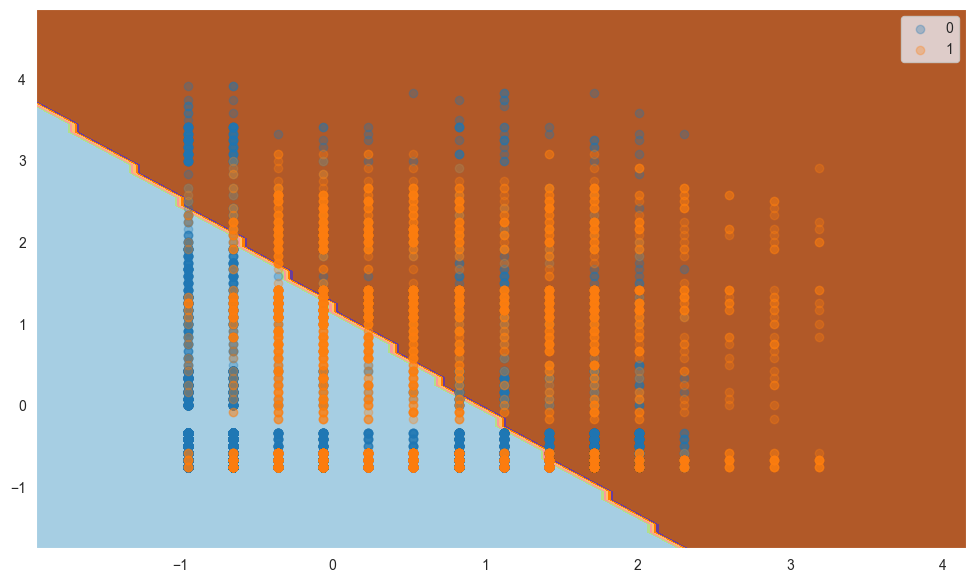

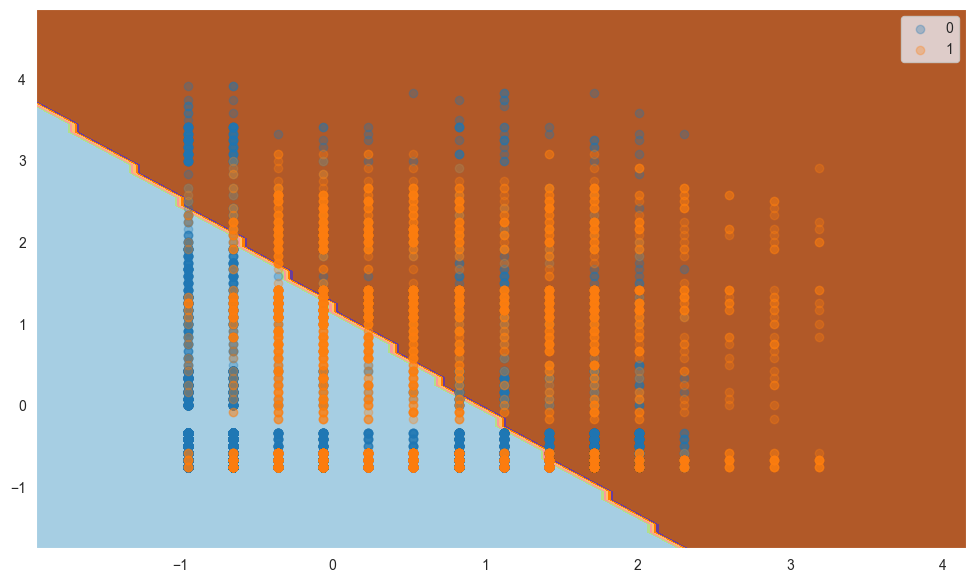

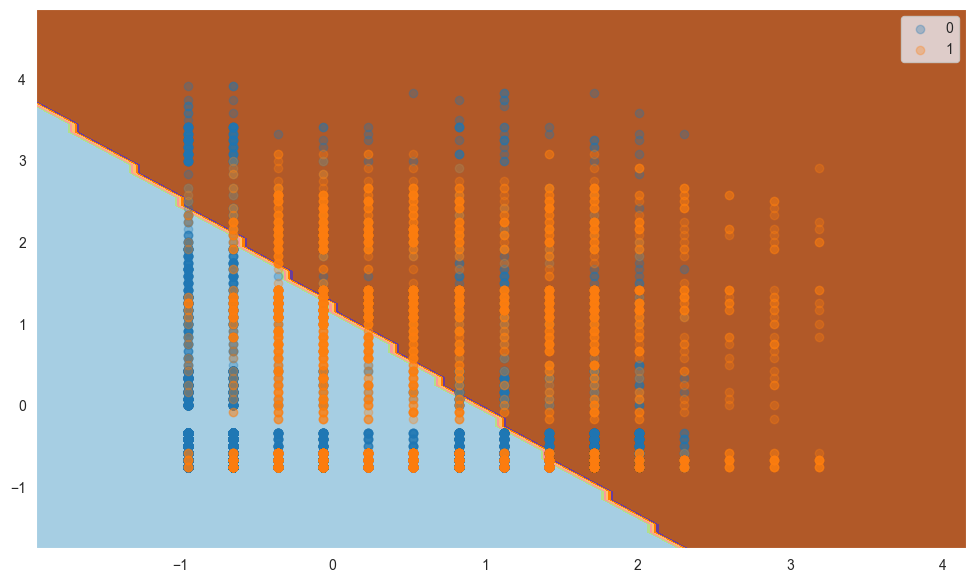

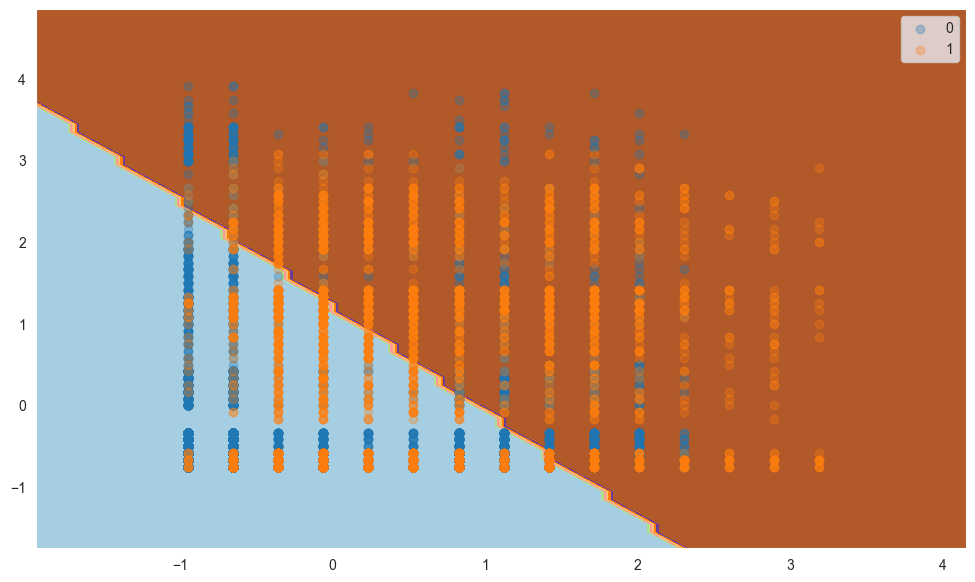

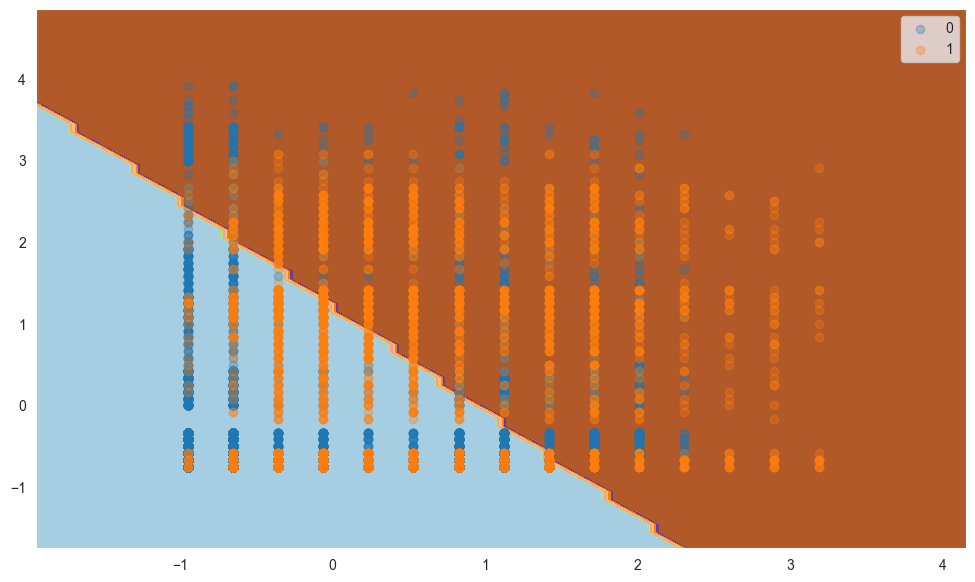

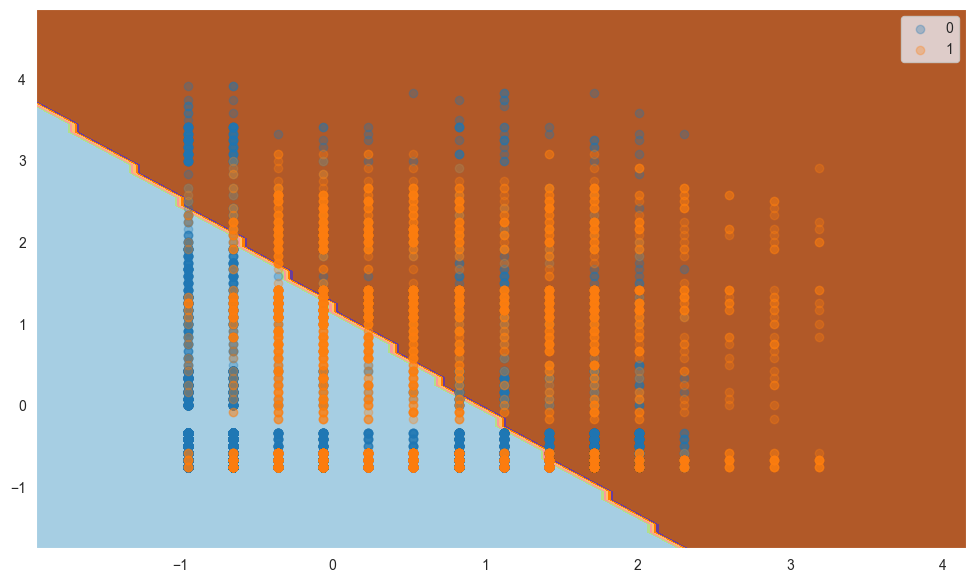

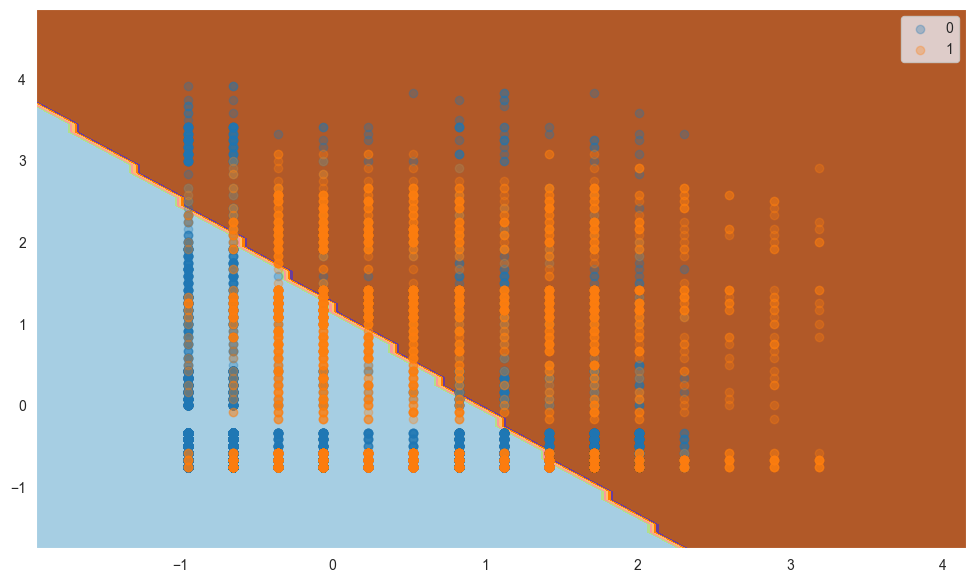

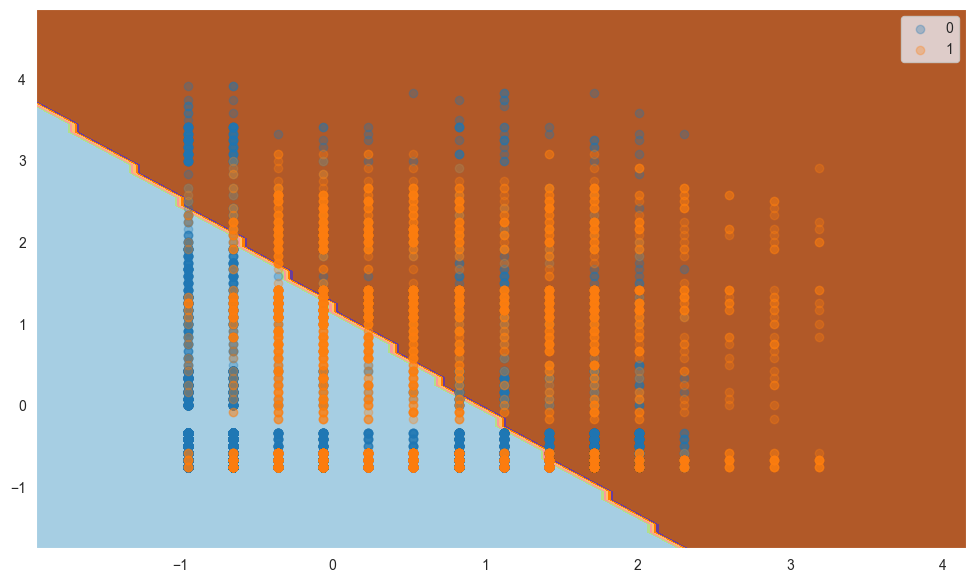

,Model params,ACC_test,ACC_train,F1_test,F1_train
0,"LogReg Penat:l1, C:0.01",0.743556,0.735143,0.577289,0.546404
1,"LogReg Penat:l1, C:0.1",0.745111,0.735333,0.580928,0.546878
2,"LogReg Penat:l1, C:1",0.745111,0.735333,0.580928,0.546878
3,"LogReg Penat:l1, C:10",0.745111,0.735333,0.580928,0.546878
4,"LogReg Penat:l1, C:100",0.745111,0.735333,0.580928,0.546878
5,"LogReg Penat:l2, C:0.01",0.745111,0.735333,0.580928,0.546878
6,"LogReg Penat:l2, C:0.1",0.745111,0.735333,0.580928,0.546878
7,"LogReg Penat:l2, C:1",0.745111,0.735333,0.580928,0.546878
8,"LogReg Penat:l2, C:10",0.745111,0.735333,0.580928,0.546878
9,"LogReg Penat:l2, C:100",0.745111,0.735333,0.580928,0.546878


In [15]:
results = []
for model in tmodels:
    predictions_lr_test = model.predict(X_test_standardized)
    predictions_lr_train = model.predict(X_train_standardized)
    acc_test = accuracy_score(y_test, predictions_lr_test)
    acc_train = accuracy_score(y_train, predictions_lr_train)
    plot_classification_surface(X_plot=X_train_standardized, y_plot=y_train, trained_model=model)
    f1_test = f1_score(y_test, predictions_lr_test)
    f1_train = f1_score(y_train, predictions_lr_train)
    results.append((tmodels_names[tmodels.index(model)],acc_test, acc_train, f1_test, f1_train))
pd.DataFrame(results, columns=['Model params', 'ACC_test', 'ACC_train', 'F1_test', 'F1_train'])